In [0]:
!unzip /content/train_bFQbE3f.zip

Archive:  /content/train_bFQbE3f.zip
  inflating: Data_Dictionary.xlsx    
   creating: __MACOSX/
  inflating: __MACOSX/._Data_Dictionary.xlsx  
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
from sklearn.preprocessing import StandardScaler


In [0]:
#reading csv files and loading into pandas dataframe
train=pd.read_csv("train.csv")
test_or=pd.read_csv('test_9K3DBWQ.csv')

In [0]:
train.shape

(32820, 44)

In [0]:
train.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,NaN,2.0,1.0,3.0,NaN,NaN,NaN,150000.0,NaN,NaN,NaN,NaN,NaN,118845.2,50000.0,NaN,51205.47,50259.0,3.0,1.0,50000.0,24740.22,114252.0,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,2806.24,11.0,14.0,11.0,1.0,NaN,6.0,176000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,159050.76,169812.0,20.0,9.0,70000.0,103102.85,174606.0,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,355.00,6.0,9.0,6.0,3.0,2.0,14.0,65000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51484.55,38942.0,16.0,4.0,11700.0,15283.00,23051.0,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,NaN,9.0,6.0,6.0,NaN,NaN,NaN,600000.0,NaN,NaN,NaN,NaN,NaN,132442.0,NaN,NaN,1981.07,2294.0,2.0,1.0,2000.0,19361.24,19529.0,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,NaN,2.0,7.0,9.0,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6462.00,10271.0,6.0,1.0,10000.0,7461.00,3194.0,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
id                       32820 non-null int64
account_type             32820 non-null object
gender                   32820 non-null object
age                      32820 non-null int64
region_code              32820 non-null int64
cc_cons_apr              32820 non-null float64
dc_cons_apr              13768 non-null float64
cc_cons_may              32820 non-null float64
dc_cons_may              15481 non-null float64
cc_cons_jun              32820 non-null float64
dc_cons_jun              11523 non-null float64
cc_count_apr             30421 non-null float64
cc_count_may             31667 non-null float64
cc_count_jun             31230 non-null float64
dc_count_apr             13768 non-null float64
dc_count_may             15481 non-null float64
dc_count_jun             17323 non-null float64
card_lim                 32811 non-null float64
personal_loan_active     2742 non-n

In [0]:
train.isnull().sum()

id                           0
account_type                 0
gender                       0
age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr              19052
cc_cons_may                  0
dc_cons_may              17339
cc_cons_jun                  0
dc_cons_jun              21297
cc_count_apr              2399
cc_count_may              1153
cc_count_jun              1590
dc_count_apr             19052
dc_count_may             17339
dc_count_jun             15497
card_lim                     9
personal_loan_active     30078
vehicle_loan_active      31974
personal_loan_closed     29937
vehicle_loan_closed      31195
investment_1             31394
investment_2             30482
investment_3             31488
investment_4             32414
debit_amount_apr          1890
credit_amount_apr         3302
debit_count_apr           1758
credit_count_apr          1758
max_credit_amount_apr     3302
debit_amount_may          2301
credit_a

In [0]:
train['cc_cons'].describe()

count     32820.000000
mean       6824.631840
std       12459.140593
min           0.000000
25%        1285.000000
50%        3141.000000
75%        7349.250000
max      408630.000000
Name: cc_cons, dtype: float64

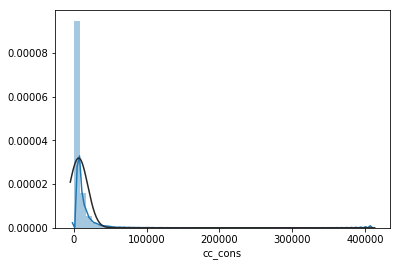

In [0]:
sns.distplot(train['cc_cons'],fit=norm)

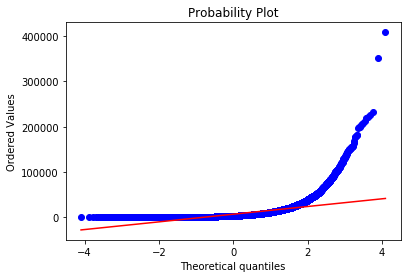

In [0]:
res = stats.probplot(train['cc_cons'], plot=plt)
plt.show()

In [0]:
#normalizing target variable
train['cc_cons']=np.log1p(train['cc_cons'])

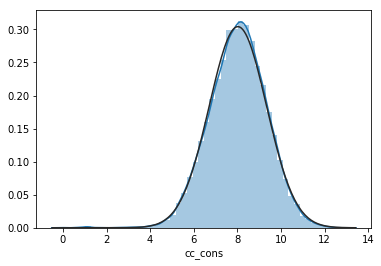

In [0]:
sns.distplot(train['cc_cons'],fit=norm)

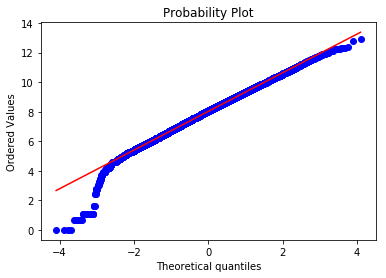

In [0]:
res = stats.probplot(train['cc_cons'], plot=plt)
plt.show()

In [0]:
#train.drop('id',axis=1,inplace=True)

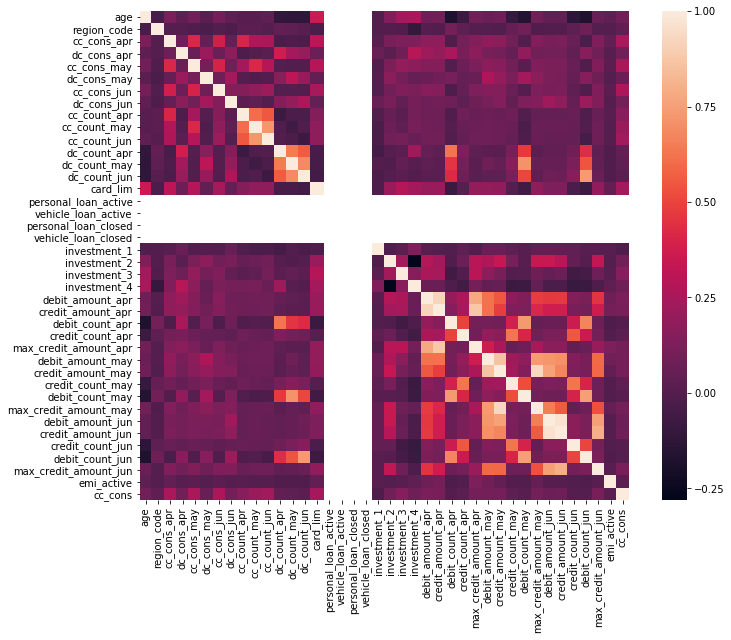

In [0]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True)

In [0]:
y_train=train['cc_cons']
train.drop('cc_cons',axis=1,inplace=True)

In [0]:
n_train=train.shape[0]
train=pd.concat((train,test_or)).reset_index(drop=True)

In [0]:
train.shape

(46887, 43)

In [0]:
train.drop('id',axis=1,inplace=True)

In [0]:
train.isnull().sum()

account_type                 0
gender                       0
age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr              27282
cc_cons_may                  0
dc_cons_may              24714
cc_cons_jun                  0
dc_cons_jun              30361
cc_count_apr              3437
cc_count_may              1695
cc_count_jun              2224
dc_count_apr             27282
dc_count_may             24714
dc_count_jun             22049
card_lim                    12
personal_loan_active     43011
vehicle_loan_active      45686
personal_loan_closed     42745
vehicle_loan_closed      44581
investment_1             44811
investment_2             43522
investment_3             44941
investment_4             46308
debit_amount_apr          2737
credit_amount_apr         4767
debit_count_apr           2546
credit_count_apr          2546
max_credit_amount_apr     4767
debit_amount_may          3302
credit_amount_may         4900
credit_c

In [0]:
train['dc_count_jun'].mode()

0    1.0
dtype: float64

Filling Missing Values

In [0]:
train['dc_cons_apr']=train['dc_cons_apr'].fillna(0)

In [0]:
train['dc_cons_may']=train['dc_cons_apr'].fillna(0)
train['dc_cons_jun']=train['dc_cons_jun'].fillna(0)

In [0]:
train['cc_count_apr']=train['cc_count_apr'].fillna(0)
train['cc_count_may']=train['cc_count_may'].fillna(0)
train['cc_count_jun']=train['cc_count_jun'].fillna(0)

In [0]:
train['dc_count_apr']=train['dc_count_apr'].fillna(train['dc_count_apr'].mode()[0])
train['dc_count_may']=train['dc_count_may'].fillna(train['dc_count_may'].mode()[0])
train['dc_count_jun']=train['dc_count_jun'].fillna(train['dc_count_jun'].mode()[0])

In [0]:
train['card_lim']=train['card_lim'].fillna(train['card_lim'].mode()[0])

In [0]:
#@@@
train['personal_loan_active']=train['personal_loan_active'].fillna(0)
train['vehicle_loan_active']=train['vehicle_loan_active'].fillna(0)
train['personal_loan_closed']=train['personal_loan_closed'].fillna(0)
train['vehicle_loan_closed']=train['vehicle_loan_closed'].fillna(0)

In [0]:
###
train['investment_1']=train['investment_1'].fillna(train['investment_1'].mode()[0])
train['investment_2']=train['investment_2'].fillna(train['investment_2'].mode()[0])
train['investment_3']=train['investment_3'].fillna(train['investment_3'].mode()[0])
train['investment_4']=train['investment_4'].fillna(train['investment_4'].mode()[0])

In [0]:
train['debit_amount_apr']=train['debit_amount_apr'].fillna(train['debit_amount_apr'].mode()[0])
train['credit_amount_apr']=train['credit_amount_apr'].fillna(train['credit_amount_apr'].mode()[0])
train['debit_count_apr']=train['debit_count_apr'].fillna(train['debit_count_apr'].mode()[0])
train['credit_count_apr']=train['credit_count_apr'].fillna(train['credit_count_apr'].mode()[0])
train['max_credit_amount_apr']=train['max_credit_amount_apr'].fillna(0)

In [0]:
train['debit_amount_may']=train['debit_amount_may'].fillna(train['debit_amount_may'].mode()[0])
train['credit_amount_may']=train['credit_amount_may'].fillna(train['credit_amount_may'].mode()[0])
train['debit_count_may']=train['debit_count_may'].fillna(train['debit_count_may'].mode()[0])
train['credit_count_may']=train['credit_count_may'].fillna(train['credit_count_may'].mode()[0])
train['max_credit_amount_may']=train['max_credit_amount_may'].fillna(0)

In [0]:
train['debit_amount_jun']=train['debit_amount_jun'].fillna(train['debit_amount_jun'].mode()[0])
train['credit_amount_jun']=train['credit_amount_jun'].fillna(train['credit_amount_jun'].mode()[0])
train['debit_count_jun']=train['debit_count_jun'].fillna(train['debit_count_jun'].mode()[0])
train['credit_count_jun']=train['credit_count_jun'].fillna(train['credit_count_jun'].mode()[0])
train['max_credit_amount_jun']=train['max_credit_amount_jun'].fillna(0)

In [0]:
train['loan_enq'].unique()

array([nan, 'Y'], dtype=object)

Feature Engineering

In [0]:
train['avg_credit_amount']=(train['credit_amount_apr'] +train['credit_amount_may'] + train['credit_amount_jun'])/3
train['avg_debit_amount']=(train['debit_amount_apr'] +train['debit_amount_may'] + train['debit_amount_jun'])/3
train['avg_max_credit_amount']=(train['max_credit_amount_apr'] +train['max_credit_amount_may'] + train['max_credit_amount_jun'])/3


In [0]:
train.drop(['credit_amount_apr','credit_amount_may','credit_amount_jun'], axis=1,inplace=True)
train.drop(['debit_amount_apr','debit_amount_may','debit_amount_jun'],axis=1,inplace=True)
train.drop(['max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun'],axis=1,inplace=True)


In [0]:
train['investment']=train['investment_1']+train['investment_2']+train['investment_3']+train['investment_4']
train.drop(['investment_1','investment_2','investment_3','investment_4'],axis=1,inplace=True)

In [0]:
train['loan_active']=train['personal_loan_active']+train['vehicle_loan_active']
train.drop(['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],axis=1,inplace=True)

In [0]:
train['avg_dc_cons']=(train['dc_cons_apr']+train['dc_cons_may']+train['dc_cons_jun'])/3
train.drop(['dc_cons_apr','dc_cons_may','dc_cons_jun'],axis=1,inplace=True)

In [0]:
train.info()

In [0]:
train.isnull().sum()

In [0]:
train.info()

In [0]:
train.isnull().sum()

In [0]:
train['account_type'].unique()

array(['saving', 'current'], dtype=object)

In [0]:
train.shape

(46887, 45)

In [0]:
#train['loan_enq']=train['loan_enq'].apply(lambda x: 1 if x=='Y' else 0)

In [0]:
#encoding categorical values
train=pd.get_dummies(train)

In [0]:
train.shape

(46887, 30)

In [0]:
train.isnull().sum()

age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_count_apr          0
credit_count_apr         0
credit_count_may         0
debit_count_may          0
credit_count_jun         0
debit_count_jun          0
emi_active               0
avg_credit_amount        0
avg_debit_amount         0
avg_max_credit_amount    0
account_type_current     0
account_type_saving      0
gender_F                 0
gender_M                 0
l

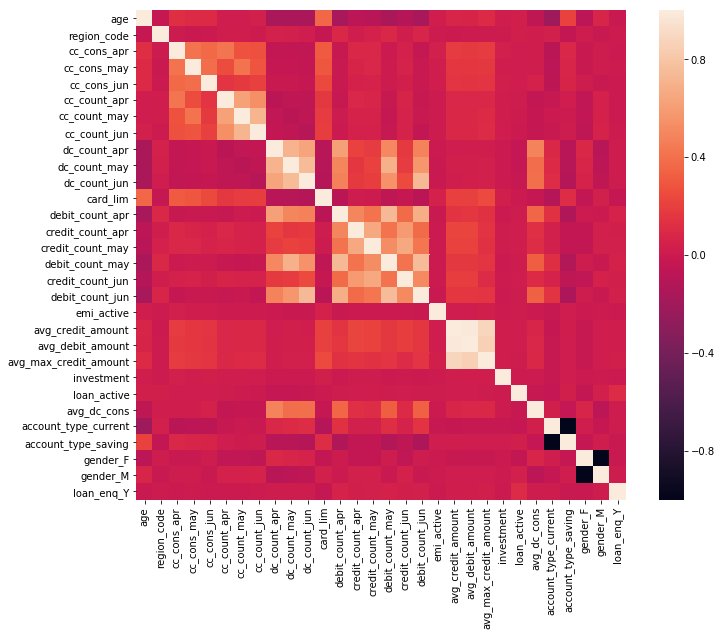

In [0]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True)

In [0]:
from sklearn import preprocessing

x = train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train= pd.DataFrame(x_scaled)

In [0]:

X_train=train[:n_train]
X_test=train[n_train:]

In [0]:
X_train.shape, X_test.shape

((32820, 35), (14067, 35))

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn import metrics
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [0]:
n_folds = 5

def rmsle_cv(model, features, labels):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(features) # Shuffle the data.
    rmse= np.sqrt(-cross_val_score(model, features, labels, scoring="neg_mean_squared_error", cv = kf))
    return(rmse.mean())

In [0]:
rid_reg = Ridge()
rid_reg.fit(X_train, y_train)
y_pred = rid_reg.predict(X_val)
rmsle_cv(rid_reg, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.86622e-17): result may not be accurate.
  overwrite_a=True).T


1.2073742132788543

In [0]:
y_pred[0]

9.193975184724472

In [0]:
metrics.mean_squared_log_error(y_pred,y_val)

0.020956113011424193

In [0]:
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=200, 
                                    random_state =5,
                                  alpha = 0.01, subsample=0.8, warm_start=True)

In [0]:
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.01, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=5,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=200,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=5,
                          subsample=0.8, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=True)

In [0]:
y_pred_GBoost=GBoost.predict(X_val)

In [0]:
import math

math.sqrt(metrics.mean_squared_log_error(y_pred_GBoost,y_val))

0.13633295294100772

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.6603, gamma=0.01, 
                             learning_rate=0.01, max_depth=3, 
                             min_child_weight=1, n_estimators=1000,
                             reg_alpha=0.01640, reg_lambda=0.01571,
                             subsample=0.8, silent=1,
                             random_state =7, nthread = -1,n_jobs=-1)


In [0]:
model_xgb.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6603, gamma=0.01,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=-1, objective='reg:linear', random_state=7,
             reg_alpha=0.0164, reg_lambda=0.01571, scale_pos_weight=1,
             seed=None, silent=1, subsample=0.8, verbosity=1)

In [0]:
y_pred_model_xgb=model_xgb.predict(X_val)

In [0]:
acc=metrics.mean_squared_log_error(y_pred_model_xgb,y_val)

In [0]:
math.sqrt(acc)

0.1413330798923979

In [0]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, min_samples_split=2)

In [0]:
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
y_pred_tree_reg=tree_reg.predict(X_val)


In [0]:
math.sqrt(metrics.mean_squared_log_error(y_pred_tree_reg,y_val))

0.14831835244258032

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.01, n_estimators=420,
                              max_bin = 55, bagging_fraction = 0.7,
                              bagging_freq = 5, feature_fraction = 0.3319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =5, min_sum_hessian_in_leaf = 11,
                              reg_lambda=0.001,
                               reg_alpha=0.001, min_child_weight=3 )

In [0]:
model_lgb.fit(X_train,y_train)

LGBMRegressor(bagging_fraction=0.7, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.3319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.01, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=3,
              min_data_in_leaf=5, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=420, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.001, reg_lambda=0.001, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [0]:
y_pred_model_lgb=model_lgb.predict(X_val)

In [0]:
math.sqrt(metrics.mean_squared_log_error(y_pred_model_lgb,y_val))

0.14245681787533035

In [0]:
rand_reg=RandomForestRegressor(max_depth=3, random_state=0 ,n_estimators=200, oob_score=True,
                              min_samples_leaf=5)

In [0]:
rand_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=True, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
y_pred_rand_reg=rand_reg.predict(X_val)

In [0]:
math.sqrt(metrics.mean_squared_log_error(y_pred_rand_reg,y_val))

0.14479407825805882

In [0]:
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge

In [0]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=3000)
svr = SVR(C=1, kernel='linear')
tree_reg = DecisionTreeRegressor(criterion='friedman_mse', max_depth=None, min_samples_split=3)
ridge_reg = Ridge(alpha=0.1)


In [0]:
from mlxtend.regressor import StackingRegressor

In [0]:
ensemble_model = StackingRegressor(regressors=[ridge_reg, GBoost, model_xgb], meta_regressor=model_lgb,
                                  use_features_in_secondary=True)

In [0]:
ensemble_model.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.86534e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


StackingRegressor(meta_regressor=LGBMRegressor(bagging_fraction=0.7,
                                               bagging_freq=5, bagging_seed=9,
                                               boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               feature_fraction=0.3319,
                                               feature_fraction_seed=9,
                                               importance_type='split',
                                               learning_rate=0.01, max_bin=55,
                                               max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=3,
                                               min_data_in_leaf=5,
                                               min_split_gain=0.0...
                    

In [0]:
y_pred_ensemble_model=ensemble_model.predict(X_val)

In [0]:
math.sqrt(metrics.mean_squared_log_error(y_pred_ensemble_model,y_val))

0.14127017627287405

In [0]:
output=GBoost.predict(X_test)

In [0]:
output=np.expm1(output)

In [0]:
test_or.shape, output.shape

((14067, 43), (14067,))

In [0]:
result=pd.DataFrame()
result['id']=test_or['id']
result['cc_cons']=output

In [0]:
result.to_csv('Am_submission5.csv',index =False)